In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
def show_img(src):
    # opencvの画像はBGR形式なのでRGBへ変換して表示する
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    plt.show()

# スケーリング(拡大/縮小)

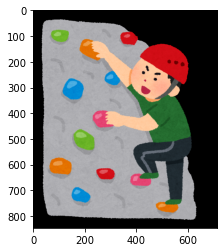

In [4]:
img = cv.imread('files/climbing_man.png')
show_img(img)

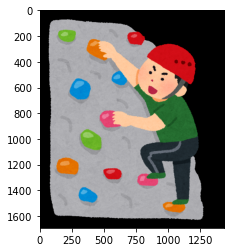

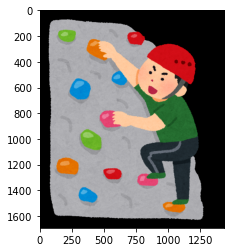

In [7]:
# 2倍に拡大
# 拡大には、INTER_CUBIVやINTER_LINEARを指定する
res = cv.resize(img, None, fx=2, fy=2, interpolation = cv.INTER_CUBIC)

show_img(res)

# これでもOK
h, w = img.shape[:2]
res = cv.resize(img, (2*w, 2*h), interpolation = cv.INTER_CUBIC)

show_img(res)

# 並進(移動)

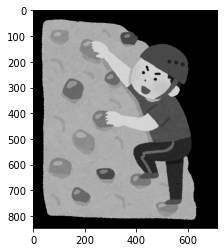

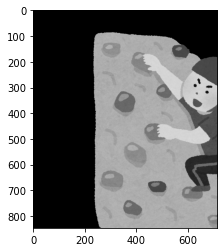

In [19]:
# NOTE: 引数に0を渡すと1チャンネルになる
img = cv.imread('files/climbing_man.png', 0)
rows, cols = img.shape

show_img(img)

# 移動には、warpAffine関数を使う
# Mは移動量をfloat32のNumpy配列で指定する
# [1, 0, x] は, X方向への移動量を指す
# [0, 1, y] は, y方向への移動量を指す
# 第3引数には(width, height)の形式で渡す
M = np.float32([[1, 0, 200], [0, 1, 50]])
dst = cv.warpAffine(img, M, (cols, rows))

show_img(dst)

# 回転

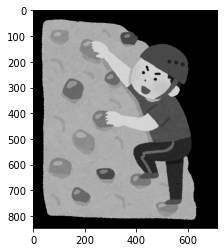

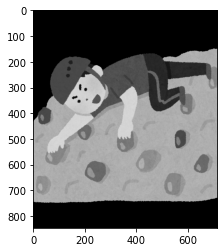

In [25]:
# NOTE: 引数に0を渡すと1チャンネルになる
img = cv.imread('files/climbing_man.png', 0)
rows, cols = img.shape

show_img(img)

# 回転の変換行列を作成する関数としてgetRotationMatrix2Dがある
# 第１引数: centerの位置
# 第2引数: 回転角度
# 第3引数: スケール
M = cv.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

show_img(dst)

# アフィン変換 

変換前後で並行性を保つ変換.
変換前と変換後の対応する座標が最低でも3組必要

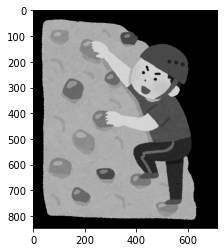

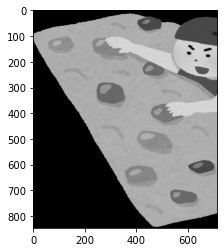

In [26]:
# NOTE: 引数に0を渡すと1チャンネルになる
img = cv.imread('files/climbing_man.png', 0)
rows, cols = img.shape

show_img(img)

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# 変換行列を作成
M = cv.getAffineTransform(pts1, pts2)
dst = cv.warpAffine(img, M, (cols, rows))

show_img(dst)

# 射影変換

射影変換は3*3の変換行列が必要
変換の前後で直線性が保たれる
変換行列の計算には最低4組の対応点の座標が必要
対応点のうち、どの3点をとっても同一直線上にのらないような4点を選ぶ必要がある

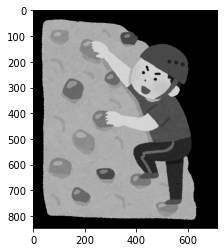

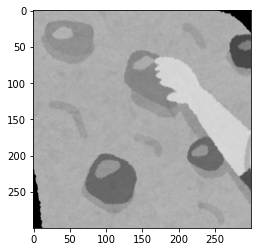

In [32]:
# NOTE: 引数に0を渡すと1チャンネルになる
img = cv.imread('files/climbing_man.png', 0)
rows, cols = img.shape

show_img(img)

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# 変換行列を作成
M = cv.getPerspectiveTransform(pts1, pts2)

dst = cv.warpPerspective(img, M, (300, 300))

show_img(dst)